✅ Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


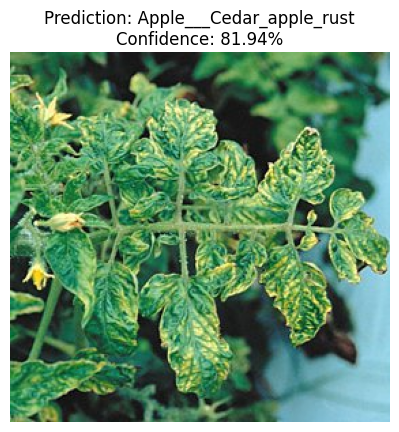

🌱 Predicted Disease: Apple___Cedar_apple_rust
📊 Confidence: 81.94%


In [1]:
# 📦 Install Required Libraries
!pip install tensorflow pillow matplotlib

# 📁 Import Libraries
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 📂 Paths to Model and Image
model_path = r"C:\Users\sagni\Downloads\Crop-Disease-Prediction\plant_disease_model.h5"
image_path = r"C:\Users\sagni\Downloads\Crop-Disease-Prediction\tobacco-mosaic-virus.jpg"

# 🧠 Load the Saved Model
model = load_model(model_path)
print("✅ Model loaded successfully!")

# 📋 Class Labels (update these with your dataset's class names)
classes = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 
           'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 
           'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
           'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight',
           'Corn_(maize)___healthy', 'Potato___Early_blight', 'Potato___Late_blight',
           'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight',
           'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
           'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
           'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

# 🖼️ Load and Preprocess Image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# 🔮 Predict Class
def predict_disease(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_class = classes[predicted_class_index]
    confidence = np.max(prediction)
    return predicted_class, confidence

# 🖼️ Display Image and Prediction
predicted_class, confidence = predict_disease(image_path)
img_display = image.load_img(image_path)

plt.imshow(img_display)
plt.title(f"Prediction: {predicted_class}\nConfidence: {confidence:.2%}")
plt.axis('off')
plt.show()

print(f"🌱 Predicted Disease: {predicted_class}")
print(f"📊 Confidence: {confidence:.2%}")
